In [63]:
import random
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_regress_exog
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import linear_model
import seaborn as sns

## Qestion 2

The KNN classifier is used to predict classes while the KNN Regression is used to predict numerical values

## Question 9

In [6]:
auto = pd.read_csv('/Users/rj/Downloads/Auto.csv', sep=',')

print(auto)

      mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0    18.0          8         307.0        130    3504          12.0    70   
1    15.0          8         350.0        165    3693          11.5    70   
2    18.0          8         318.0        150    3436          11.0    70   
3    16.0          8         304.0        150    3433          12.0    70   
4    17.0          8         302.0        140    3449          10.5    70   
..    ...        ...           ...        ...     ...           ...   ...   
392  27.0          4         140.0         86    2790          15.6    82   
393  44.0          4          97.0         52    2130          24.6    82   
394  32.0          4         135.0         84    2295          11.6    82   
395  28.0          4         120.0         79    2625          18.6    82   
396  31.0          4         119.0         82    2720          19.4    82   

     origin                       name  
0         1  chevrolet chevelle ma

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement'>,
        <Axes: xlabel='weight', ylabel='displacement'>,
        <Axes: xlabel='acceleration', ylabel='di

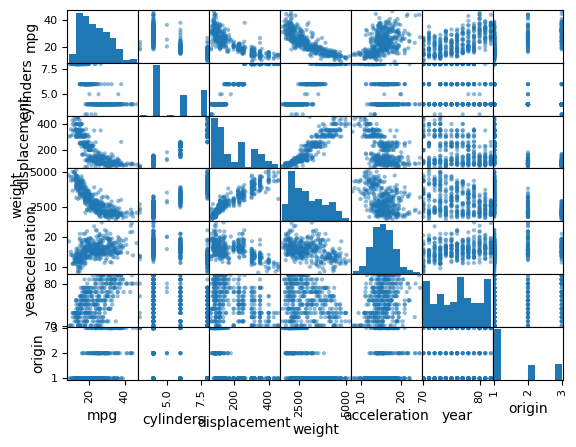

In [7]:
pd.plotting.scatter_matrix(auto)

In [14]:
auto1=auto.drop(columns=['name'])
auto1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [16]:
auto1.replace('?', np.nan, inplace=True)
auto1 = auto1.apply(pd.to_numeric)

In [17]:
auto1.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


In [27]:
auto1.dropna(inplace=True)

In [28]:
X = auto1.drop(columns=['mpg'])
y = auto1['mpg']


In [29]:
X = sm.add_constant(X)

In the model below we can see that 82 percent of the the changes in response can be explained by the predictors. The significant predictors are displacement weight year and orgin. The coefficient variable for year suggests that the mpg a car has increases by 0.75 for every year.

In [33]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 12 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        11:15:05   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Below we have some diagnostic plots to analyze some of our predictors in our regression model. When looking at them we can see soem outliers early on in the residuals but they seem to remain pretty constant. Usually high leverage is non existant....idk what this means.

/Users/rj/Library/Python/3.9/lib/python/site-packages/statsmodels/graphics/regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


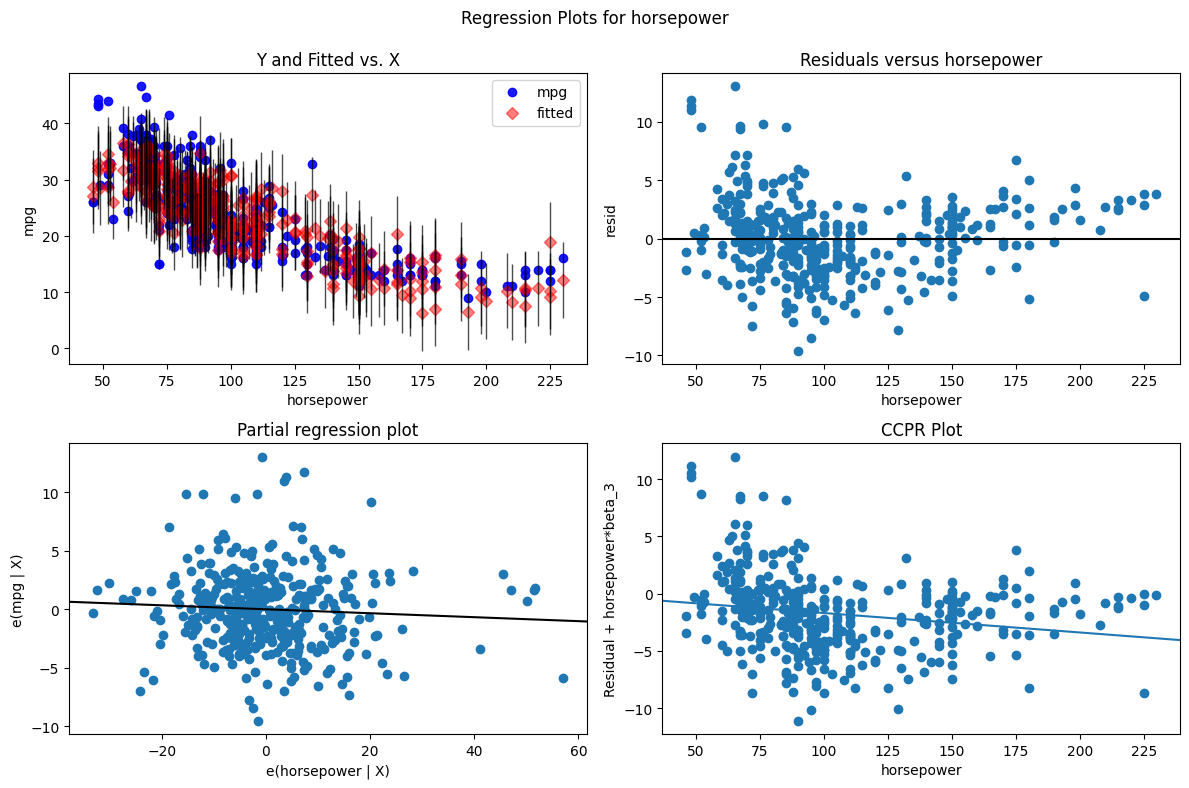

In [40]:
fig = plt.figure(figsize=(12, 8))
plot_regress_exog(model, 'horsepower', fig=fig)
plt.show()

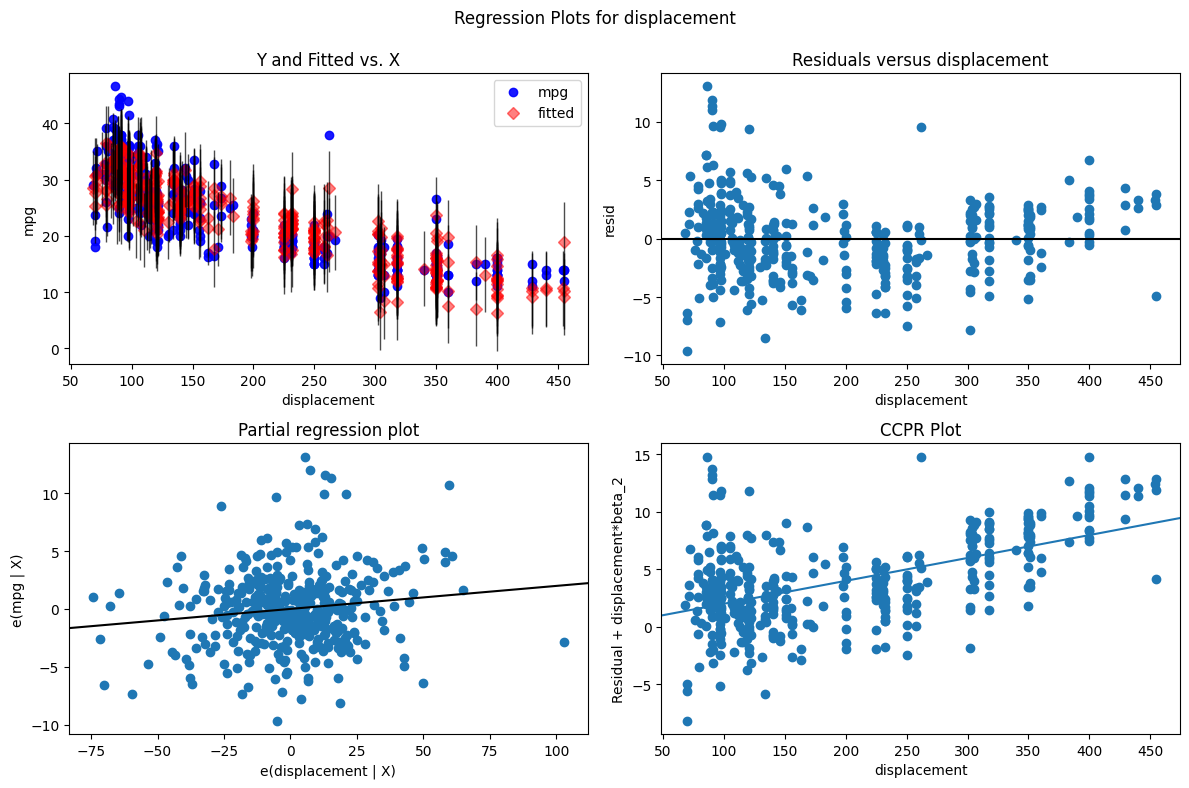

In [41]:
fig = plt.figure(figsize=(12, 8))
plot_regress_exog(model, 'displacement', fig=fig)
plt.show()

In [46]:
lm3_fit = sm.OLS(y, X).fit()

lm3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 14 Feb 2024   Prob (F-statistic):          2.04e-139
Time:                        08:21:33   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [47]:
lm4_fit = sm.OLS(y, np.log(X)).fit()

lm4_fit.summary()

/Users/rj/Library/Python/3.9/lib/python/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.984
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              3453.
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:24:30   Log-Likelihood:                         -998.94
No. Observations:                 392   AIC:                                      2012.
Df Residuals:                     385   BIC:                                      2040.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const                 0          0        nan        nan           0           0
cylinders        1.6093      1.687      0.954      0.341      -1.708       4.927
displacement    -0.2794      1.551     -0.180      0.857      -3.329       2.771
horsepower      -8.0287      1.558     -5.153      0.000     -11.092      -4.965
weight         -14.3771      2.212     -6.501      0.000     -18.725     -10.029
acceleration    -5.6909      1.625     -3.503      0.001      -8.885      -2.497
year            43.5453      1.927     22.593      0.000      39.756      47.335
origin           1.4350      0.516      2.783      0.006       0.421       2.449
==============================================================================
Omnibus:                       46.761   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.173
Skew:                           0.657   Prob(JB):                     1.31e-21
Kurtosis:                       5.041   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Question 10

In [58]:
carseats = pd.read_csv('/Users/rj/Downloads/Carseats.csv')
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [59]:
lm5_fit = smf.ols(formula='Sales ~ Price + Urban + US', 
                  data=carseats).fit()

lm5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           2.39e-23
Time:                        08:32:14   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0435      0.651     20.036      0.000      11.764      14.323
Urban[T.Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[T.Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
Price           -0.0545      0.005    -10.389      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

10.B
Urban: If Urban, sales, decrease by 0.02, but not significant
US: If US, sales increase by 1.2
Price: Every unit increase in price decrease sales by 0.05

10.C
Sales = 13.0435 - 0.0219 * Urban + 1.2006 * US - 0.0545 * Price + e

10.D
US and Price

In [60]:
lm6_fit = smf.ols(formula='Sales ~ Price + US', 
                  data=carseats).fit()

lm6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           2.66e-24
Time:                        08:35:26   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0308      0.631     20.652      0.000      11.790      14.271
US[T.Yes]      1.1996      0.258      4.641      0.000       0.692       1.708
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
lm5_fit.rsquared_adj, lm6_fit.rsquared_adj

(0.2335123269733287, 0.23543045965311715)

In [62]:
lm6_fit.conf_int()

,0,1
Intercept,11.79032,14.271265
US[T.Yes],0.69152,1.707766
Price,-0.06476,-0.044195


In [65]:
from statsmodels.graphics.regressionplots import *
from scipy.stats import zscore

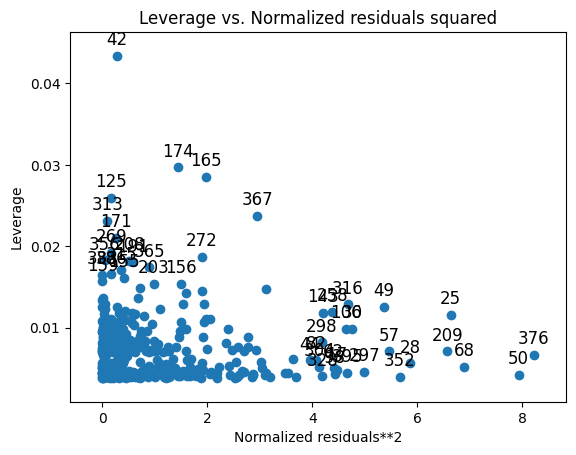

In [66]:
plot_leverage_resid2(lm6_fit);

## question 12

12.A
When Y^2 is equal to X^2

In [2]:
random.seed(123)
x = np.random.normal(loc=0, scale=1, size=100)
random.seed(123)
y = -np.asarray(sorted(x, key=lambda x: random.random()))
print(np.sum(x**2))
print(np.sum(y**2))


94.811823638611
94.81182363861099


In [3]:
import statsmodels.api as sm
mod1=sm.OLS(y,x).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                             0.3874
Date:                Mon, 12 Feb 2024   Prob (F-statistic):                       0.535
Time:                        09:04:58   Log-Likelihood:                         -139.03
No. Observations:                 100   AIC:                                      280.1
Df Residuals:                      99   BIC:                                      282.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0624      0.100      0.622      0.535      -0.137       0.261
==============================================================================
Omnibus:                        5.818   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                3.231
Skew:                          -0.220   Prob(JB):                        0.199
Kurtosis:                       2.237   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
random.seed(123)
x = np.random.normal(loc=0, scale=1, size=100)
random.seed(123)
y = x * (-1)
print(np.sum(x**2))
print(np.sum(y**2))

82.52573516760552
82.52573516760552


In [68]:
mod1=sm.OLS(y,x).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.233e+32
Date:                Wed, 14 Feb 2024   Prob (F-statistic):                        0.00
Time:                        08:48:00   Log-Likelihood:                          3362.3
No. Observations:                 100   AIC:                                     -6723.
Df Residuals:                      99   BIC:                                     -6720.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.0000   6.69e-17  -1.49e+16      0.000      -1.000      -1.000
==============================================================================
Omnibus:                        2.144   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.342   Jarque-Bera (JB):                1.649
Skew:                          -0.134   Prob(JB):                        0.438
Kurtosis:                       2.431   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""